Collection of implemented Algorithms for the Lecture Algorithm Techniques SS25 HTWG Konstanz

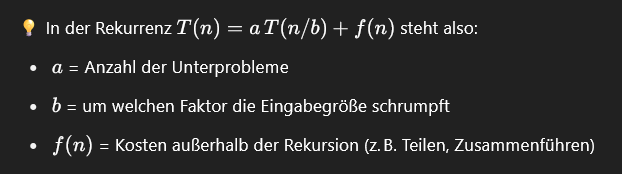

# Binary representation

Represent a number in its binary form

a = 1
b = 2

f(n) = O(1)



In [ ]:
def binary(n):
  if (n > 0):
    binary(int(n // 2)) 
    print(n % 2, end="")

binary(8)

1000

# Anzahl der nicht negativen elemente eines arrays

Divide and conquer Ansatz zum zaehlen aller nicht negativen Elemente einer Liste.

a = 2
b = 2

logb(a) log2(2) = 1
alpha = 1

f(n) = O(1)



In [ ]:
n = [-3, 0, 5, -1, 4, 2, -6, 7]


def non_negative(n, left, right):
  
  if (right - left) > 0:
    m = int((right + left) / 2) # divide
    return non_negative(n, left, m) + non_negative(n, m + 1, right) # conquer

  return 0 if n[left] > 0 else 1 # base case

res = non_negative(n, 0, len(n) - 1)
print(res)


5


# Binary Search

Suche ein Element in einer sortierten Liste

a = 1
b = 2

logb(a) = log2(1) = 0 = O(n^0) = 0

f(n) = O(1)

O(1) <= O(n^alpha - epsilon)

Fall 1: O(1) * logn = O(log(n))

In [ ]:
n = [1, 4, 7, 10, 13, 17, 20]


def binary_search(elem, n, left, right):
  m = (left + right) // 2

  if n[m] == elem: return m
  
  if right - left >= 0:
    if n[m] > elem:
      return binary_search(elem, n, left, m - 1)
    return binary_search(elem, n, m + 1, right)
  
  return None

res = binary_search(20, n, 0, len(n) - 1)
print(res)
  





6


# Merge Sort

ist klar was gemeint ist


Laufzeit:

a = 2
b = 2
alpha = log2(2) = 1  -> n^1 -> O(n)

f(n) = O(n)

Fall 2: O(n log(n))

In [10]:
import copy

n = ["A", "S", "O", "R", "T", "I", "N", "G", "E", "X", "A", "M", "P", "L", "E"]
n2 = [6,3,8,2,7,4,1]

def merge(n, l, r):
  tmp = []
  inversion_count = 0

  m = (l + r) // 2
  l_p = l
  r_p = m + 1

  while l_p <= m and r_p <= r:
    if n[l_p] > n[r_p]:
      inversion_count += (m - l_p + 1)
      tmp.append(n[r_p])
      r_p+=1
    else:
      tmp.append(n[l_p])
      l_p+=1
  
  while l_p <= m:
    tmp.append(n[l_p])
    l_p+=1
  while r_p <= r:
    tmp.append(n[r_p])
    r_p+=1
  
  for i in range(len(tmp)):
    n[l + i] = tmp[i]

  return inversion_count
      

def merge_sort(n, left, right):
  if (left >= right):
    return 0
  m = (left + right) // 2

  invl = merge_sort(n, left, m)
  invr = merge_sort(n, m + 1, right)
  return invl + invr + merge(n, left, right)
  

inversions = merge_sort(n2, 0, len(n2) - 1)
print(inversions)



14
['A', 'A', 'E', 'E', 'G', 'I', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'X']


# Quicksort

Laufzeit:

a = 2
b = 2

log2(2) = 1   n^1 -> O(n)


f(n) = O(n)

Fall 2: O(n*log(n))

In [ ]:
n = [4, 7, 1, 3, 3, 8, 5, 10, 1, 8]


def quick_sort(n, left, right):

  if right - left < 1:
    return n

  pivot = n[right]
  i = left - 1
  
  for j in range(left, right):
    if n[j] <= pivot:
      i+=1
      n[i], n[j] = n[j], n[i]

  n[i + 1], n[right] = n[right], n[i + 1]

  quick_sort(n, left, i) # use i (new pivot index as right bound)
  quick_sort(n, i + 2, right) # use i + 2 as left bound  

quick_sort(n, 0, len(n) - 1)
print(n)



[1, 1, 3, 3, 4, 5, 7, 8, 8, 10]


# Zaehlen der Swaps in einer unsortierten Liste mit Hilfe von Merge Sort

In [ ]:
import copy

n = ["A", "S", "O", "R", "T", "I", "N", "G", "E", "X", "A", "M", "P", "L", "E"]

def merge(n, l, r):
  tmp = []

  m = (l + r) // 2
  l_p = l
  r_p = m + 1

  while l_p <= m and r_p <= r:
    if n[l_p] > n[r_p]:
      tmp.append(n[r_p])
      r_p+=1
    else:
      tmp.append(n[l_p])
      l_p+=1
  
  while l_p <= m:
    tmp.append(n[l_p])
    l_p+=1
  while r_p <= r:
    tmp.append(n[r_p])
    r_p+=1
  
  for i in range(len(tmp)):
    n[l + i] = tmp[i]
      

def merge_sort(n, left, right):
  if (left >= right):
    return
  m = (left + right) // 2

  merge_sort(n, left, m)
  merge_sort(n, m + 1, right)
  merge(n, left, right)
  

merge_sort(n, 0, len(n) - 1)
print(n)



# ggT Divide and Conquer


Laufzeit O(log(b))

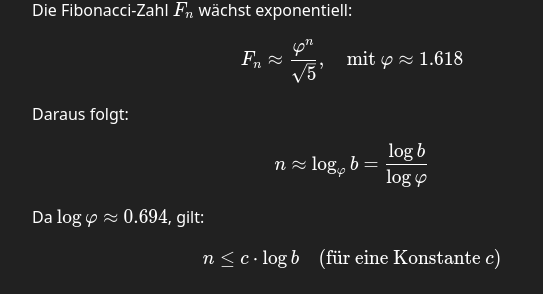

In [ ]:

def ggT(n1, n2):
  if n1 == 0: return n2
  if n2 == 0: return n1

  if n1 >= n2:
    return ggT(n2, n1 % n2)
  return ggT(n1, n2 % n1)


res = ggT(48, 18)
print(res)

# Max Sum sub array divide and conquer approach

In [3]:


def maxSum(n, left, right):

  m = (left + right) // 2
  lp = m
  rp = m + 1

  if right - left < 2:
    return n[left]
  

  lm = maxSum(n, left, m)
  rm = maxSum(n, m + 1, right)

  lo = n[lp]
  ro = n[rp]

  max_lo = lo
  max_ro = ro

  while lp > left:
    lp -= 1
    if lo + n[lp] > max_lo:
      max_lo = lo + n[lp]
    lo = lo + n[lp]
  
  while rp < right:
    rp += 1
    if ro + n[rp] > max_ro:
      max_ro = ro + n[rp]
    ro = ro + n[rp]
  om = max_lo + max_ro
  return max([lm, rm, om])


n = [10,-4,3,-1,2,-2, 10]

maxSum(n, 0, len(n) - 1)


18

# Inverse Potenzen berechnen

In [7]:


def inv_pot(n, y):

  if n == 1:
    return 1 / y
  
  s = int(n / 2)
  return inv_pot(s, y) * inv_pot(n - s, y)

inv_pot(4, 2)


0.0625